In [1]:
import sys, os
sys.path.insert(1, '/nfs/cms/martialc/DTUpgrade/src')

%load_ext autoreload
%autoreload 2

In [3]:
import dtupy_analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
from pathlib import Path
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit
import builtins
import time
import itertools

import dtupy_analysis.dqm as dqm
from dtupy_analysis.dqm.pairing.segments import MuTE, distance_matrix, get_pairs
from dtupy_analysis.dqm.reco import MuSGO, MuSTIO, MuSE, SegDF
from dtupy_analysis.dqm import units as u


In [9]:
path = '/nfs/cms/martialc/DTUpgrade/data/cosmic_240904_long_noThetaBounds.fits'
with MuTE(path, batch_size=10) as mute:
    for i, data in enumerate(mute):
        break
data

,st,sl,bx0,t4,t3,t2,t1,pattID,latsID,theta,x0,v,t0,chi2,MT1,MT2,MT,NT1,NT2,NT
seg_idx,,,,,,,,,,,,,,,,,,,,
24573,1,2,6680804512,116.781644,305.844144,43.344144,376.937894,RLR,RLRL,0.150337,297.378809,0.0545,-23.031644,0.004079,384.735163,385.907038,385.321101,210.141019,211.312894,0.585938
24578,1,2,6656479616,97.641019,239.047269,188.266019,161.703519,RLR,RLRL,-0.174259,218.935254,0.0545,-97.641019,0.130982,388.641413,382.000788,385.321101,174.984769,168.344144,-3.320312
24582,1,2,6710858944,119.613675,325.863675,71.176175,253.988675,LRR,LRRL,-0.354713,462.319336,0.0545,-55.551175,2.950680,361.102351,421.258601,391.180476,162.582425,222.738675,30.078125
24585,1,2,6660468416,303.598050,187.191800,95.785550,388.754300,RLR,RLRL,0.405302,260.094336,0.0545,-87.191800,0.029006,383.758601,386.883601,385.321101,242.269925,245.394925,1.562500
24586,1,2,6670611616,274.887113,195.199613,94.418363,397.543363,RLR,RLRL,0.381555,469.455664,0.0545,-85.043363,0.355328,390.789851,379.852351,385.321101,245.980863,235.043363,-5.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24780,1,1,6829403936,-10.562106,335.531644,114.437894,201.937894,LRL,LRLR,0.264668,541.407715,0.0545,33.999606,0.054840,383.172663,387.469538,385.321101,158.187894,162.484769,2.148438
24781,1,1,6915179232,369.418363,224.105863,10.824613,166.293363,RLL,RLLR,0.682141,256.098145,0.0545,9.487887,0.776888,206.024225,414.227350,310.125788,88.558988,296.762113,104.101563
24782,1,1,6802733056,325.277738,331.527738,65.902738,47.933988,RLL,RLLR,0.723685,503.670020,0.0545,-31.527738,13.686722,255.633601,527.117976,391.375788,56.918363,328.402738,135.742188


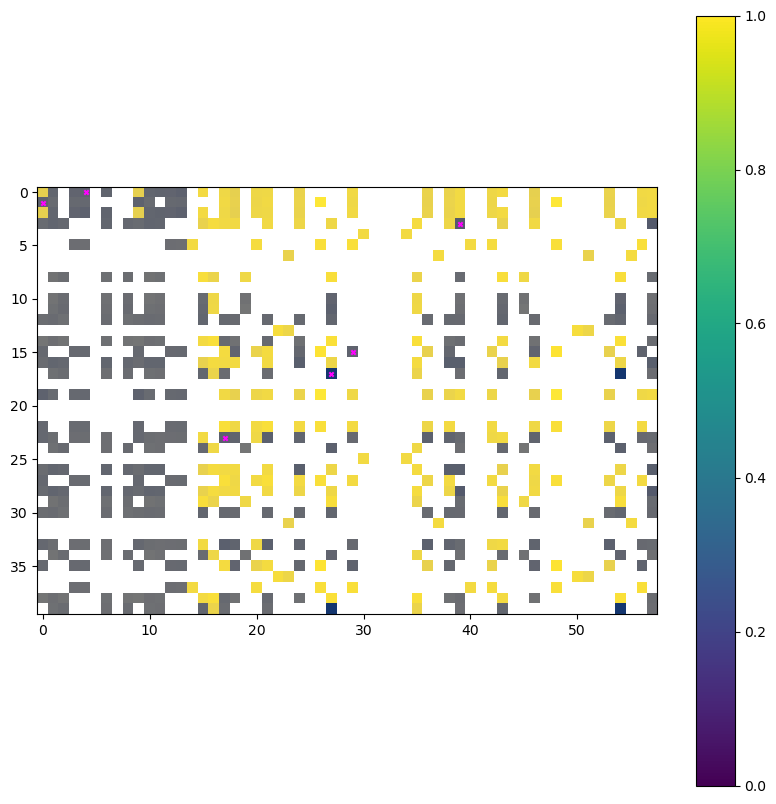

In [7]:
plt.figure(figsize=(10,10))
diff_total, mask = distance_matrix(data.df,1,2)

plt.imshow(np.where(mask, diff_total, np.nan).T, cmap='cividis', vmin=0)
plt.scatter(*list(zip(*get_pairs(diff_total, mask)[0])), marker='x', color='fuchsia', s=10)
plt.colorbar()
plt.show()